## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [160]:
# Import libraries 
import pandas as pd 
import numpy as np 
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

# For default view 
pd.set_option("display.max_columns", 50)


## Import Data 

### IMDB Dataset 1 

In [161]:
conn = sqlite3.connect("im.db")

# Create a cursor object
cursor = conn.cursor()

# Query to list all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of table names
print("Tables in the database:", [table[0] for table in tables])

Tables in the database: ['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers']


In [162]:
# loading the dataset
df_1 = pd.read_sql("""SELECT *FROM movie_basics;""",conn)

# loading the dataset
df_2 = pd.read_sql("""SELECT *FROM movie_ratings;""",conn)


### Inner join 

In [163]:
# Inner join merge df_1 and df_2
db_df = pd.merge(df_1, df_2, on = ['movie_id'], how = 'inner')
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [164]:
# Rename columns
db_df = db_df.rename(columns = {'primary_title':'title', 'movie_id':'id'})
db_df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


### Dataset 2

In [165]:
df_2 = pd.read_csv("tmdb.movies.csv")
df_2.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


### Strip whitespace from strings in a column

In [166]:
# Strip white spaces in columns 
df_2.columns = df_2.columns.str.strip().str.lower().str.replace(' ', '_')

# Strip white spaces in values 
df_2 = df_2.apply(lambda col: col.str.strip() if col.dtype == ["object", "number", "category"] else col)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [167]:
df_2 = df_2.drop(columns=['unnamed:_0', 'genre_ids', 'original_language', 'popularity', 
                          'original_title','vote_count', 'id', 'vote_average' ], errors="ignore")
df_2.head()

,release_date,title
0,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,How to Train Your Dragon
2,2010-05-07,Iron Man 2
3,1995-11-22,Toy Story
4,2010-07-16,Inception


In [168]:
# Convert release date to datetime format
df_2['release_date'] = pd.to_datetime(df_2['release_date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   release_date  26517 non-null  datetime64[ns]
 1   title         26517 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 414.5+ KB


In [169]:
df_2 = df_2.drop_duplicates()
df_2.duplicated().sum()

0

## Merge datasets 

In [170]:
df = pd.merge(db_df, df_2, on = ['title'], how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75828 entries, 0 to 75827
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               75828 non-null  object        
 1   title            75828 non-null  object        
 2   original_title   75828 non-null  object        
 3   start_year       75828 non-null  int64         
 4   runtime_minutes  68101 non-null  float64       
 5   genres           75011 non-null  object        
 6   averagerating    75828 non-null  float64       
 7   numvotes         75828 non-null  int64         
 8   release_date     18893 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.2+ MB


In [171]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,NaT
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,NaT
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,NaT
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,NaT


In [172]:
df = df.dropna()

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               18268 non-null  object        
 1   title            18268 non-null  object        
 2   original_title   18268 non-null  object        
 3   start_year       18268 non-null  int64         
 4   runtime_minutes  18268 non-null  float64       
 5   genres           18268 non-null  object        
 6   averagerating    18268 non-null  float64       
 7   numvotes         18268 non-null  int64         
 8   release_date     18268 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.4+ MB


In [174]:
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01


In [175]:
df.duplicated().sum()

0

# Feature engineering 

In [176]:
def age_of_movie(value):
    if value <= 1980:
        return 'Old'
    
    elif 1928 <= value <= 2000:
        return 'Classic' 
    else:
        return 'Modern'
    
df['movie_age'] = df['start_year'].apply(age_of_movie)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern


In [177]:
def movie_duration(value):
    if value <= 60:
        return 'Short'
    
    elif 60 <= value <= 120:
        return 'Medium' 
    
    else:
        return 'Long'
    
df['movie_length'] = df['runtime_minutes'].apply(movie_duration)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium


### Weighted rating using baysian average 

In [178]:
import pandas as pd
import numpy as np

# Global average rating
C = df['averagerating'].mean()

# Minimum votes threshold (80th percentile)
m = df['numvotes'].quantile(0.8)

# Bayesian Average Function
def bayesian_average(row, C, m):
    v = row['numvotes']
    R = row['averagerating']
    return (v / (v + m) * R) + (m / (v + m) * C)

# Apply Bayesian Average to each row
df['adjusted_movie_rating'] = df.apply(lambda row: bayesian_average(row, C, m), axis=1)

# Print the result to verify
df.head()


,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782


In [179]:
df['title_similarity'] = (df['title'] != df['original_title']).astype(int)
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0


In [180]:
title = df['title_similarity'].value_counts()
title

title_similarity
0    15790
1     2478
Name: count, dtype: int64

- How title change affects rating, number of votes etc

### Creating Seasons columns 

In [181]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['release_date'] = pd.to_datetime(df['release_date'])

# Extract 'Year' from the 'Date' column
df['month'] = df['release_date'].dt.month
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

In [182]:
def categorize_seasons(month):
    
    if month in [12, 1, 2]:
        return 'Winter'
    
    elif month in [3, 4, 5]:
        return 'Spring'
    
    elif month in [6, 7, 8]:
        return 'Summer'
    
    elif month in [9, 10, 11]:
        return 'Fall'
    
df['season'] = df['month'].apply(categorize_seasons)

df.head()
    

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter


In [183]:
def movie_ratings(value):
    if value <= 4.9:
        return 'low'
    
    elif 5.0 <= value <= 7.9:
        return 'Average' 
    
    else:
        return 'High'
    
df['movie_rating'] = df['averagerating'].apply(movie_ratings)  
df.head()

,id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie_age,movie_length,adjusted_movie_rating,title_similarity,month,season,movie_rating
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2018-11-02,Modern,Long,6.393036,0,11,Fall,Average
13,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,4.0,72,2018-11-06,Modern,Medium,5.873616,1,11,Fall,low
16,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2013-05-07,Modern,Medium,3.346636,0,5,Spring,low
19,tt0255820,Return to Babylon,Return to Babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,2013-08-11,Modern,Medium,5.902448,0,8,Summer,Average
25,tt0285252,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219,2010-01-01,Modern,Medium,5.812782,0,1,Winter,low


## Genre list 

In [184]:
# Split the 'genres' column into a list but keep the original column
df['genres_list'] = df['genres'].str.split(',')  # Create a new column 'genres_list'

# Expand the 'genres_list' into separate columns
genres_expanded = df['genres_list'].apply(pd.Series)  # This expands the list into columns
genres_expanded = genres_expanded.rename(columns=lambda x: f'genre_{x+1}')  # Rename the columns

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, genres_expanded], axis=1)


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

# Univariate Analysis

##  Runtime Analysis

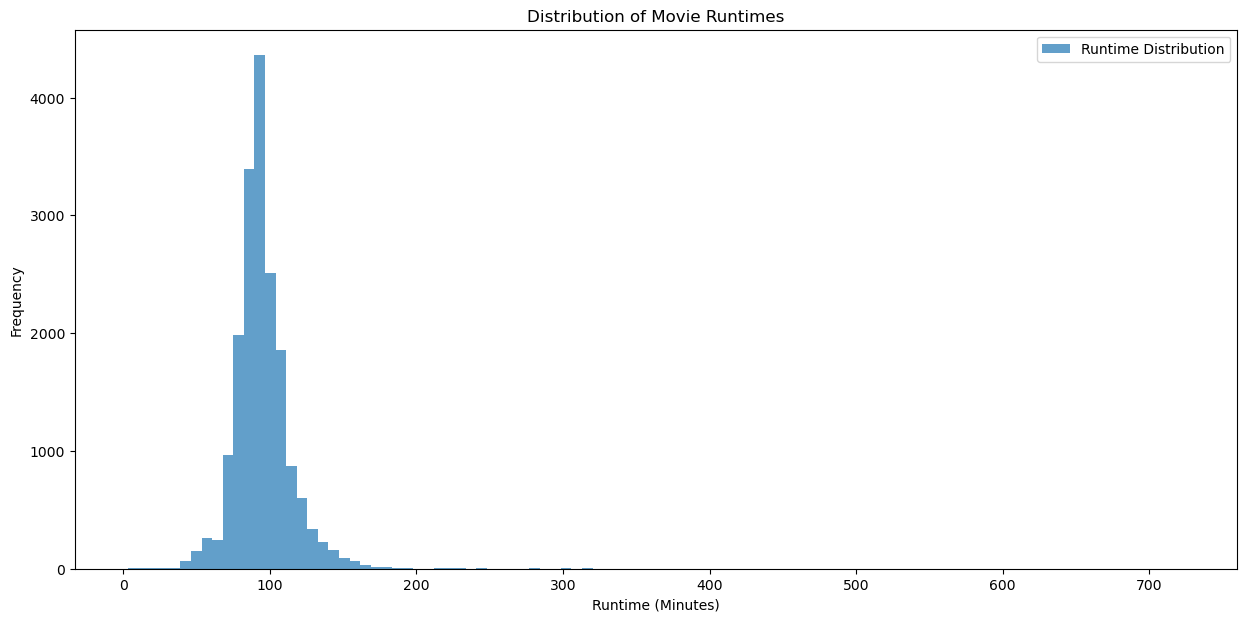

In [186]:
# Set the figure size before plotting
plt.figure(figsize=(15,7))

# Plot the histogram and set the label directly
plt.hist(df['runtime_minutes'], bins=100, alpha=0.7, label='Runtime Distribution')

# Set labels and title
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


### Observation 
- From the above we can see that most movies runtime is about 100minutes. hence when while choosing runtime for the movie it should fall between 90 and 110 minutes.

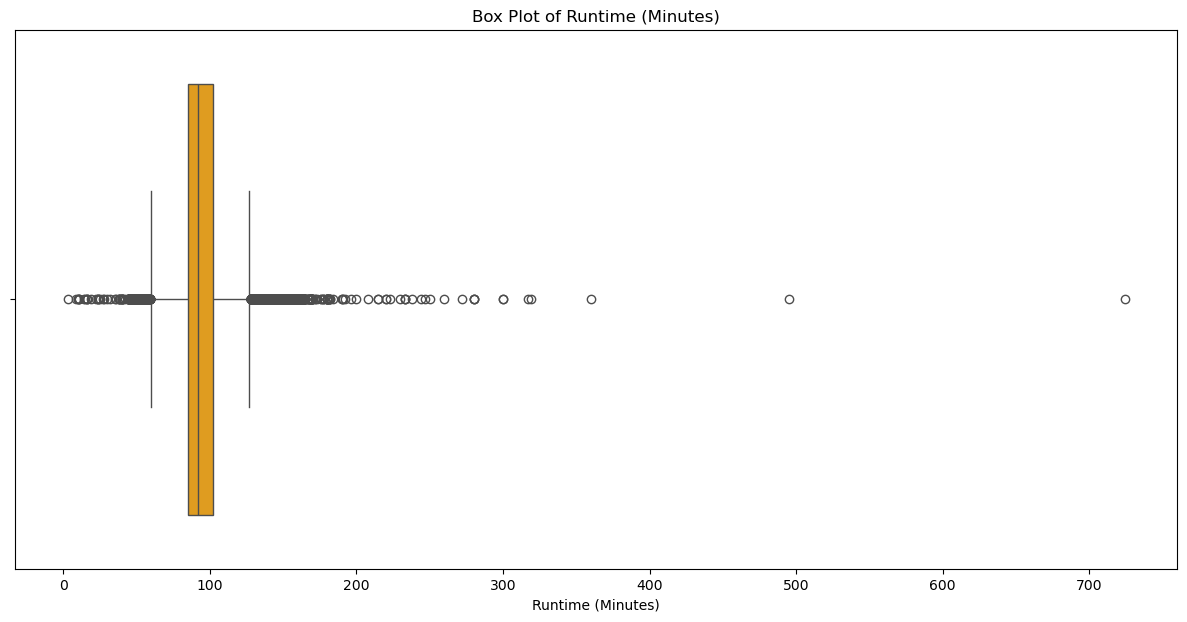

In [187]:
# Box plot for runtime_minutes
plt.figure(figsize=(15,7))
sns.boxplot(x=df['runtime_minutes'], color='orange')
plt.title('Box Plot of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.show()

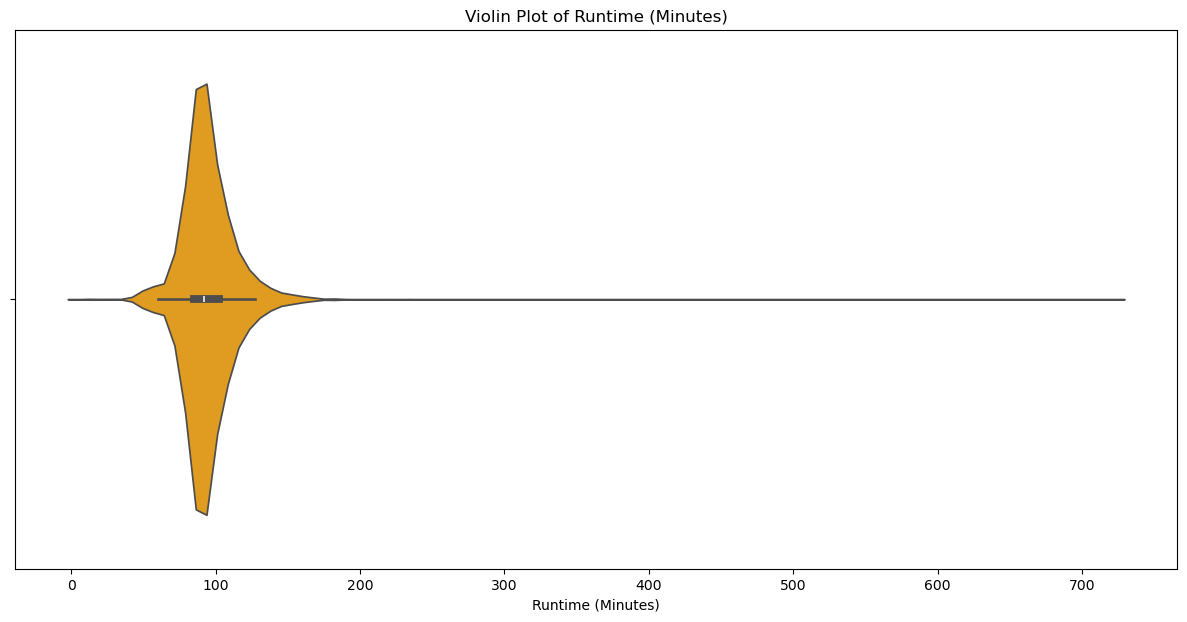

In [188]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['runtime_minutes'], color='orange')
plt.title('Violin Plot of Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.show()


## Genre Analysis

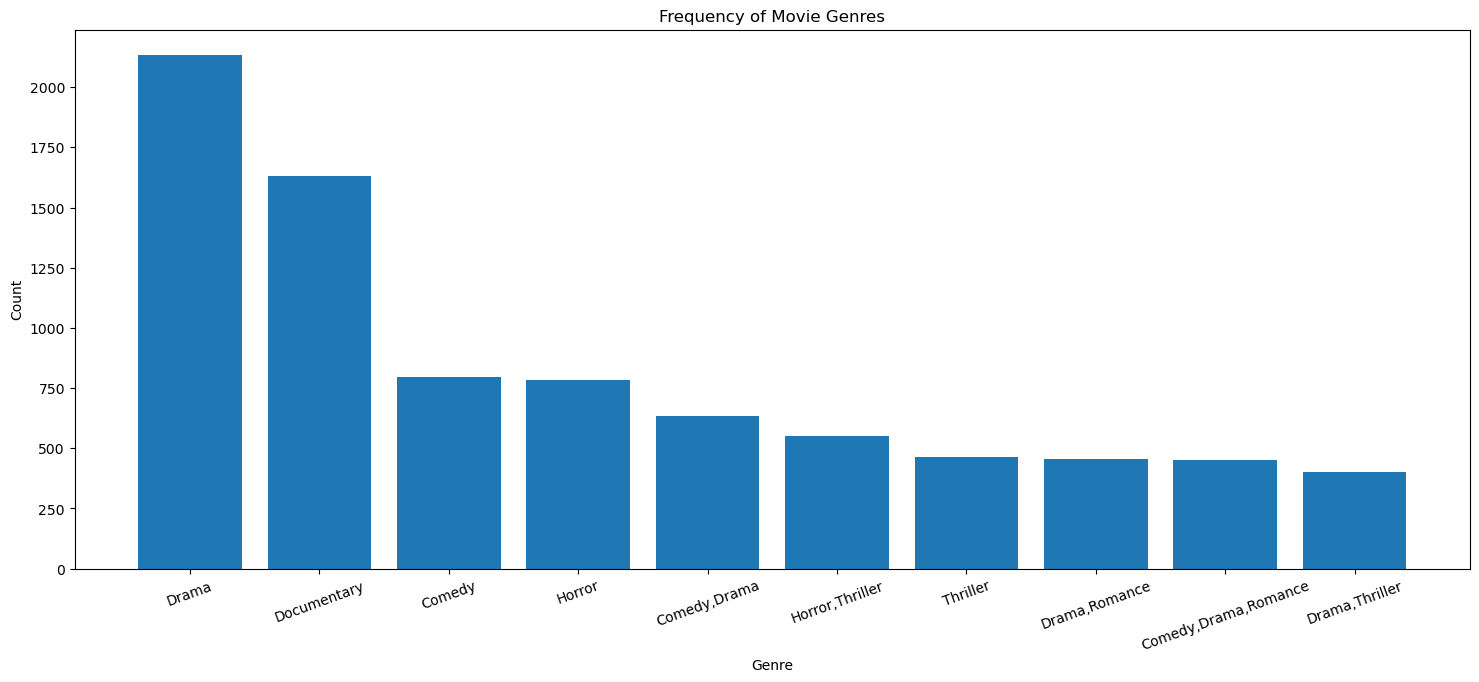

In [189]:
movie_genres = df['genres'].value_counts().reset_index(name='count')[:10]
movie_genres
plt.figure(figsize=(18,7))
plt.bar( movie_genres['genres'],movie_genres['count'] )
plt.title('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=20)

plt.show()

### Observations 
- From the above bar plot we can deduce that drama and documentary in movie genres are the most liked and watched. Hence would be most appropriate genres to focus on while starting out.

### Average Rating 

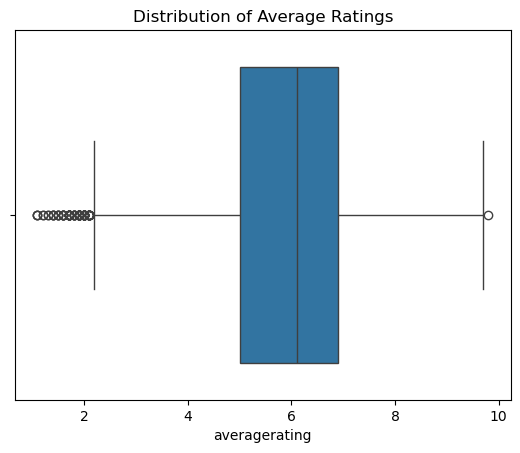

In [190]:
#  Average Rating Analysis
sns.boxplot(x=df['averagerating'])
plt.title('Distribution of Average Ratings')
plt.show()

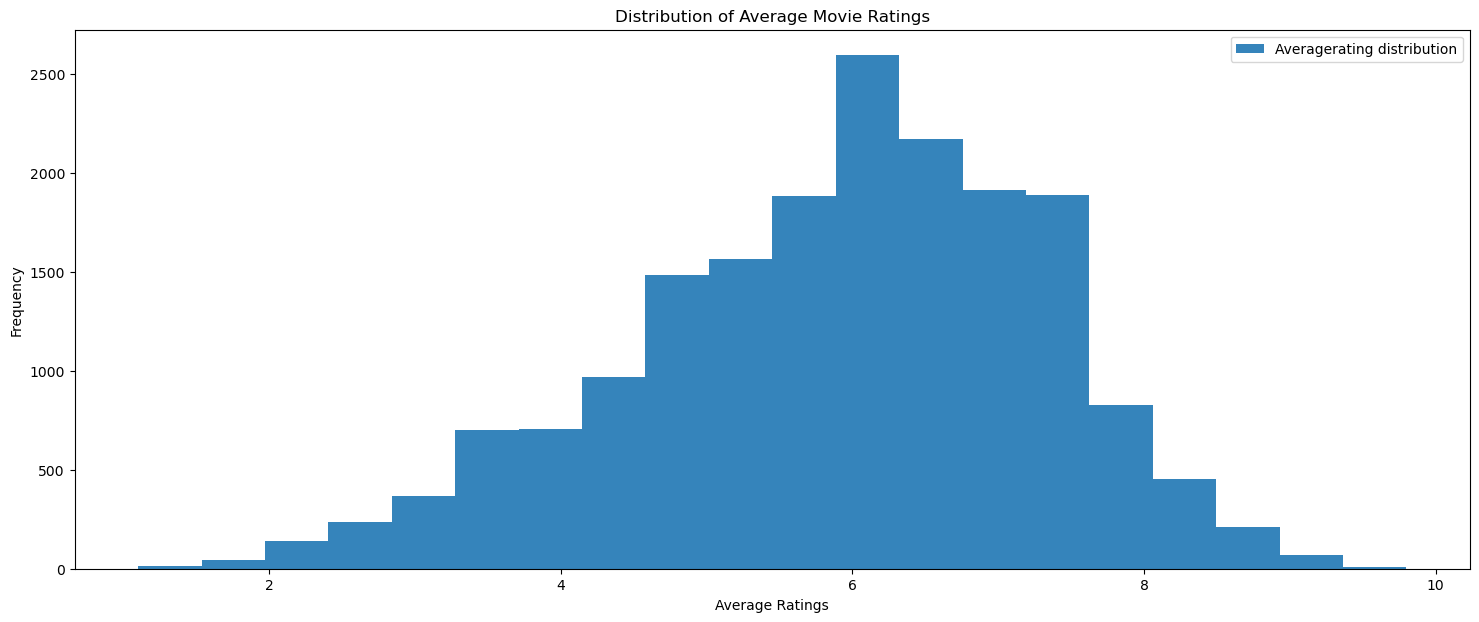

In [191]:
# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['averagerating'], bins=20, alpha=0.9,  label='Averagerating distribution')

# Set labels and title
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


## Adjusted movie rating 

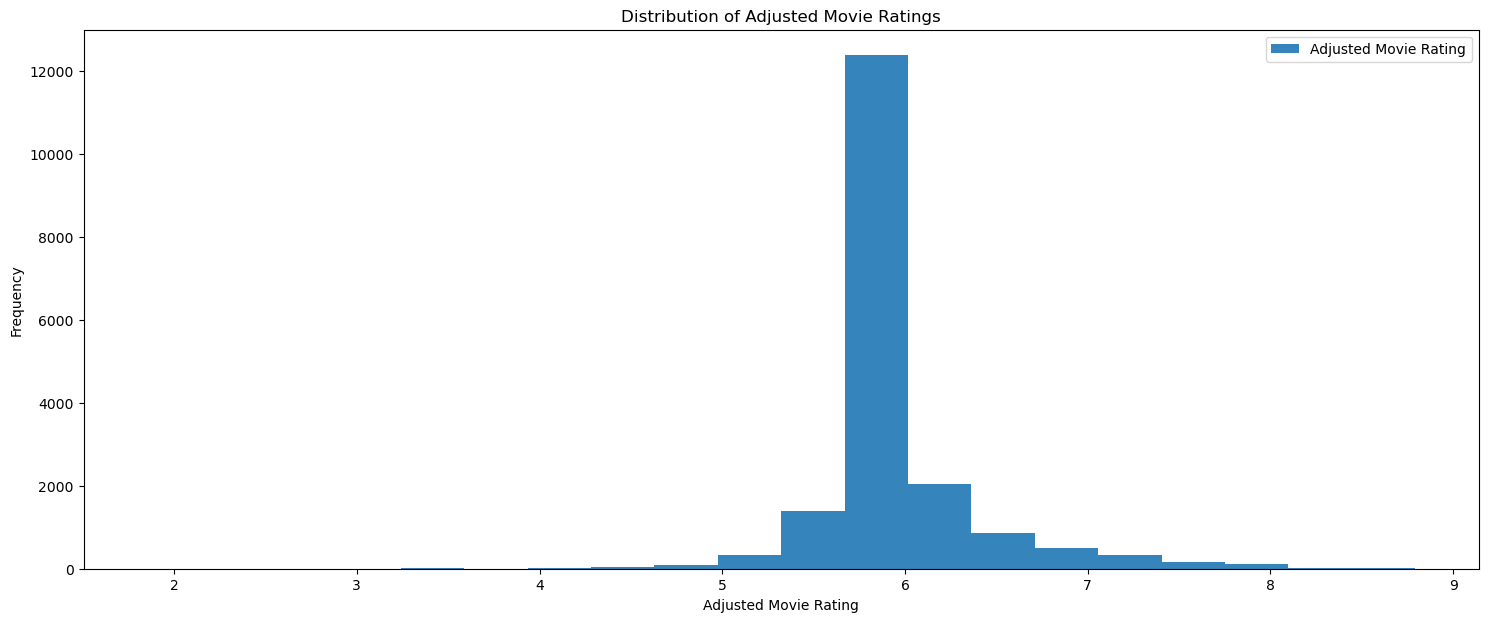

In [192]:

# Set the figure size before plotting
plt.figure(figsize=(18,7))

# Plot the histogram and set the label directly
plt.hist(df['adjusted_movie_rating'], bins=20, alpha=0.9,  label='Adjusted Movie Rating')

# Set labels and title
plt.title('Distribution of Adjusted Movie Ratings')
plt.xlabel('Adjusted Movie Rating')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


### Bar plot for movie_rating

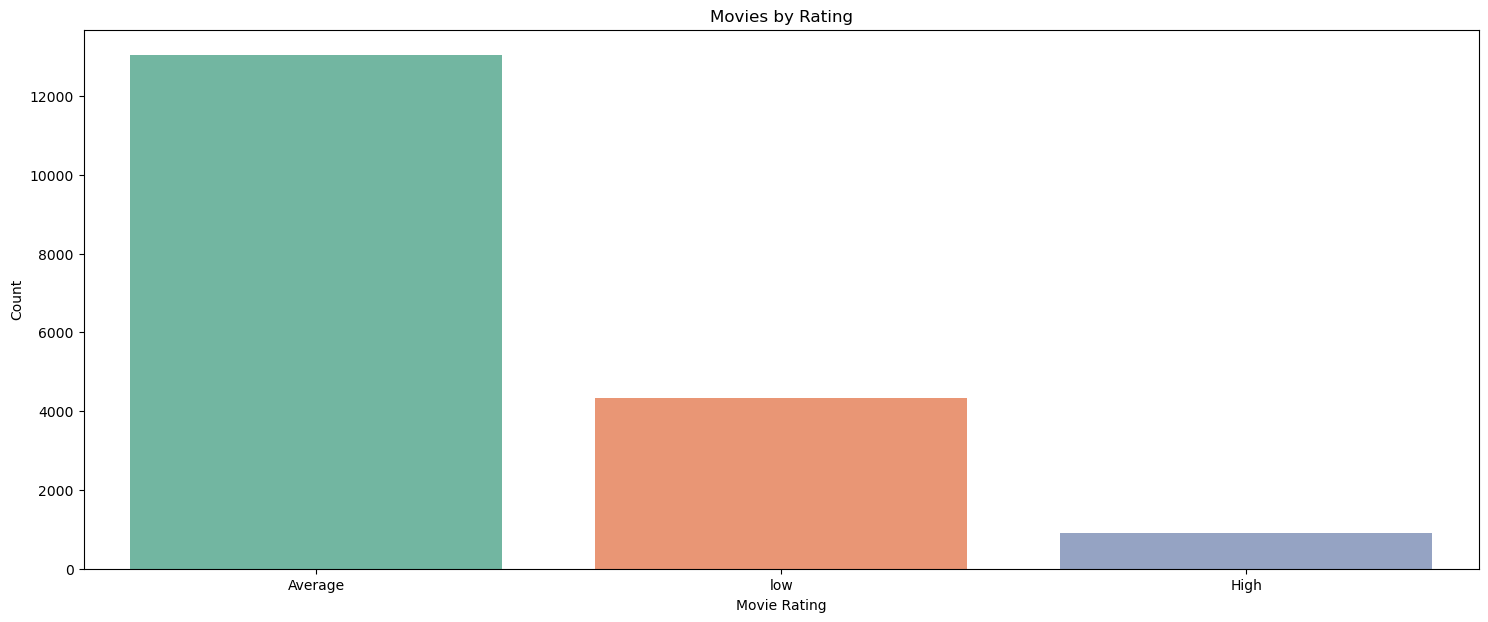

In [193]:
# Using a predefined color palette
plt.figure(figsize=(18,7))
sns.countplot(x='movie_rating', data=df, order=df['movie_rating'].value_counts().index, 
              palette='Set2', hue='movie_rating')

plt.title('Movies by Rating')
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.show()

#### Observation
- From the above we can see that most movies have an average rating 

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

## Movie length 


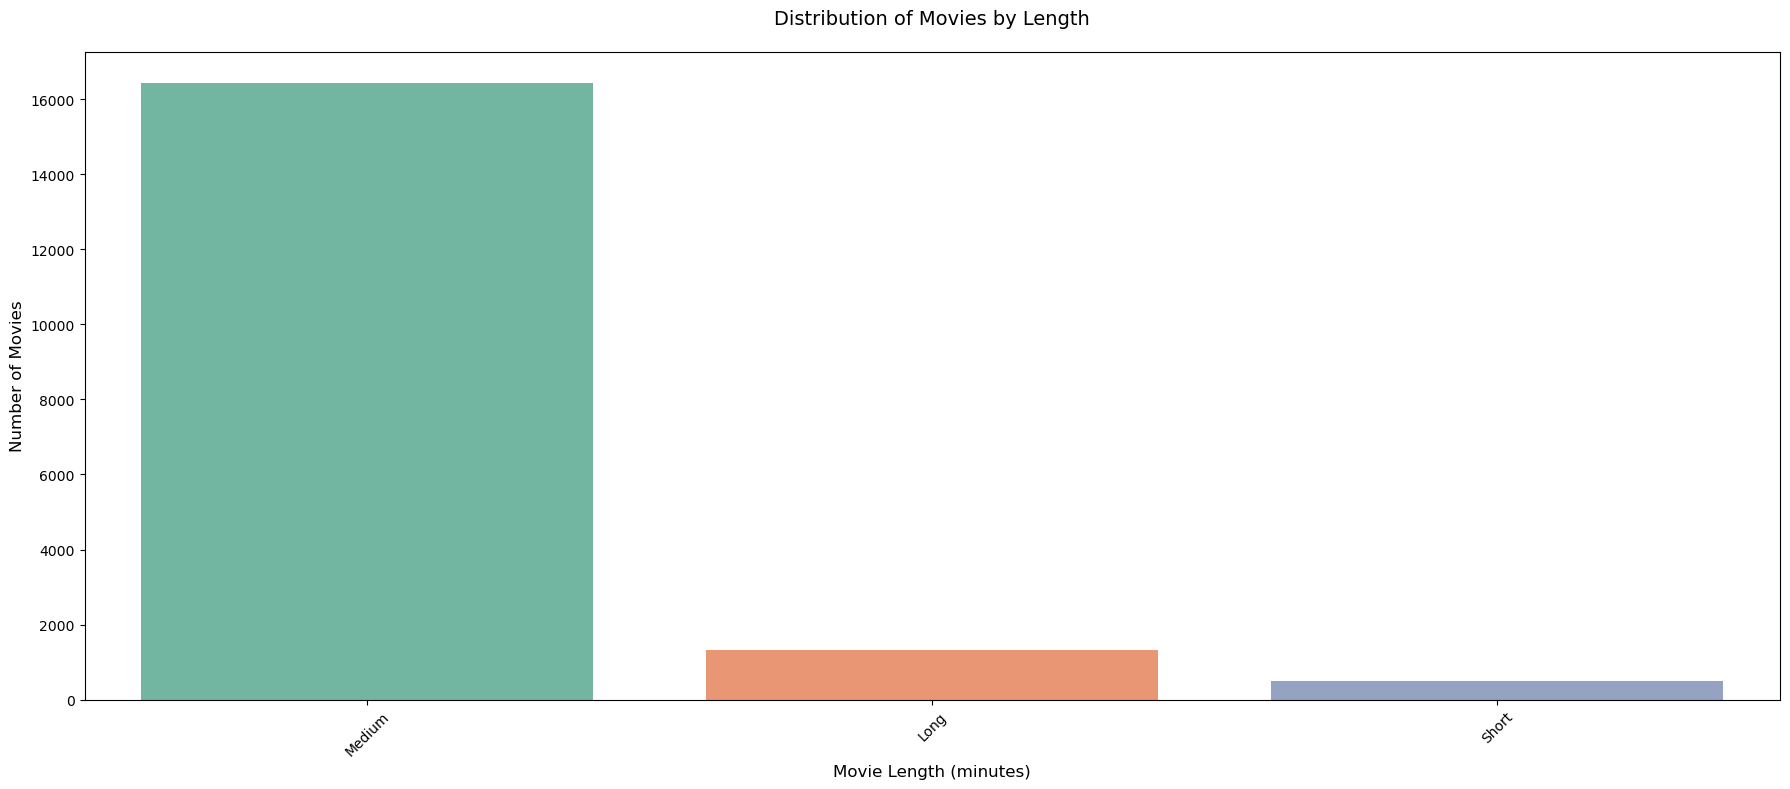

In [195]:
# Calculate the value counts and reset index
movie_length = df['movie_length'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='movie_length',
    y='count',
    palette='Set2',
    hue= 'movie_length',
)

# Customize the plot
plt.title('Distribution of Movies by Length', pad=20, fontsize=14)
plt.xlabel('Movie Length (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)



# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


## Season with most movies

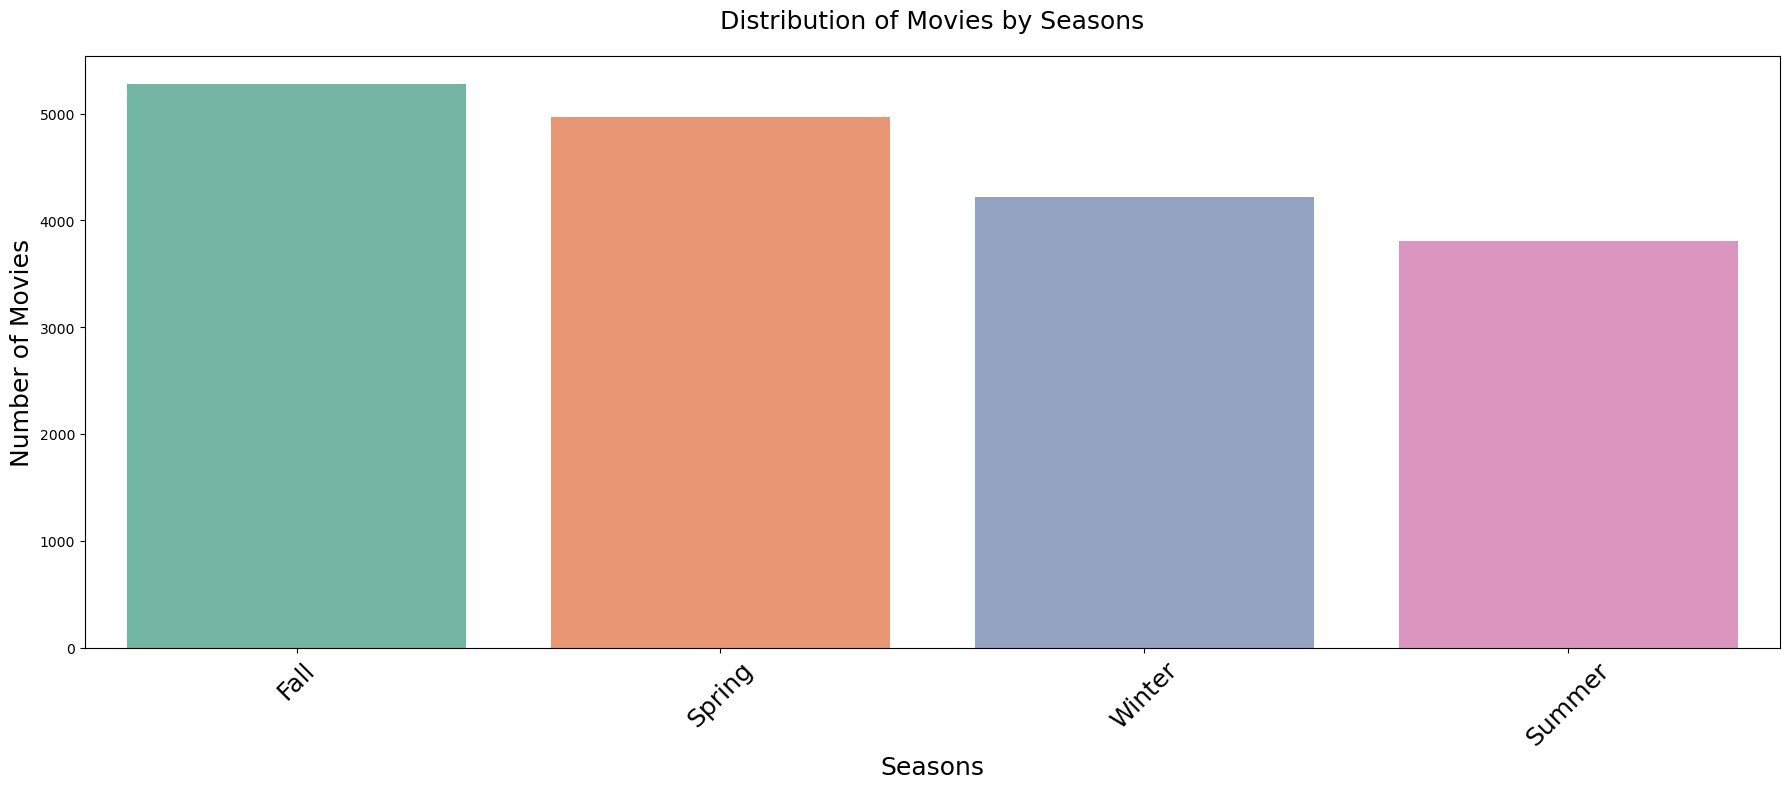

In [196]:
# Calculate the value counts and reset index
movie_length = df['season'].value_counts().reset_index(name='count')

# Create figure with larger size
plt.figure(figsize=(18, 8))

# Create Bar Plot using modern color palette
sns.barplot(
    data=movie_length,
    x='season',
    y='count',
    palette='Set2',
    hue= 'season',
)

# Customize the plot
plt.title('Distribution of Movies by Seasons', pad=20, fontsize=18)
plt.xlabel('Seasons', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=18)


# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()


## Word Cloud 

In [197]:
#! pip install WordCloud

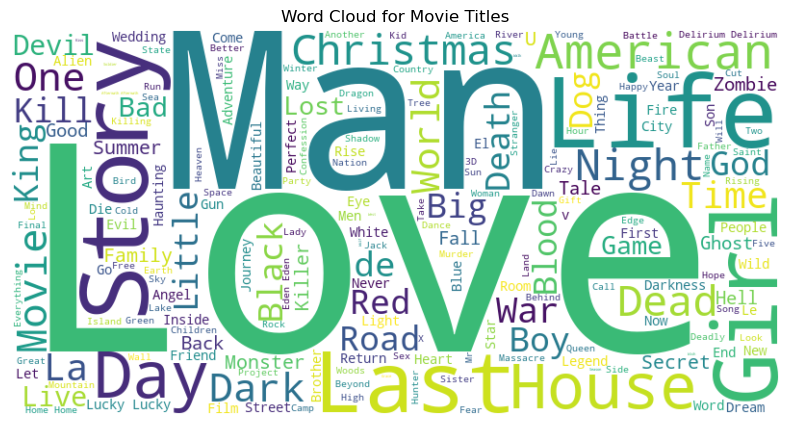

In [198]:
from wordcloud import WordCloud
# Combine all titles into a single string
all_titles = ' '.join(df['title'] + ' ' + df['original_title'])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Titles')
plt.show()


### Movie Rating 

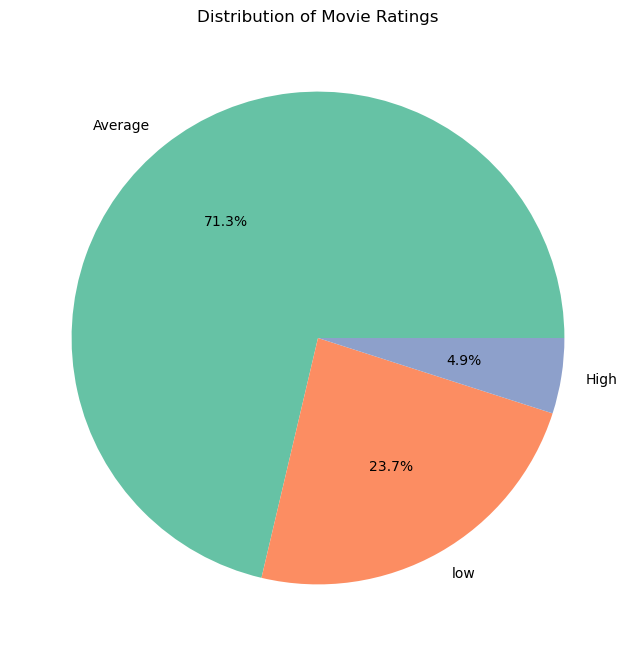

In [199]:
# Pie chart for movie_rating
# Create figure with larger size
plt.figure(figsize=(6, 6))
df['movie_rating'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=sns.color_palette('Set2'))
plt.title('Distribution of Movie Ratings')
plt.ylabel('')
plt.show()

# Bivariate Analysis

In [ ]:
## Genre vs season 

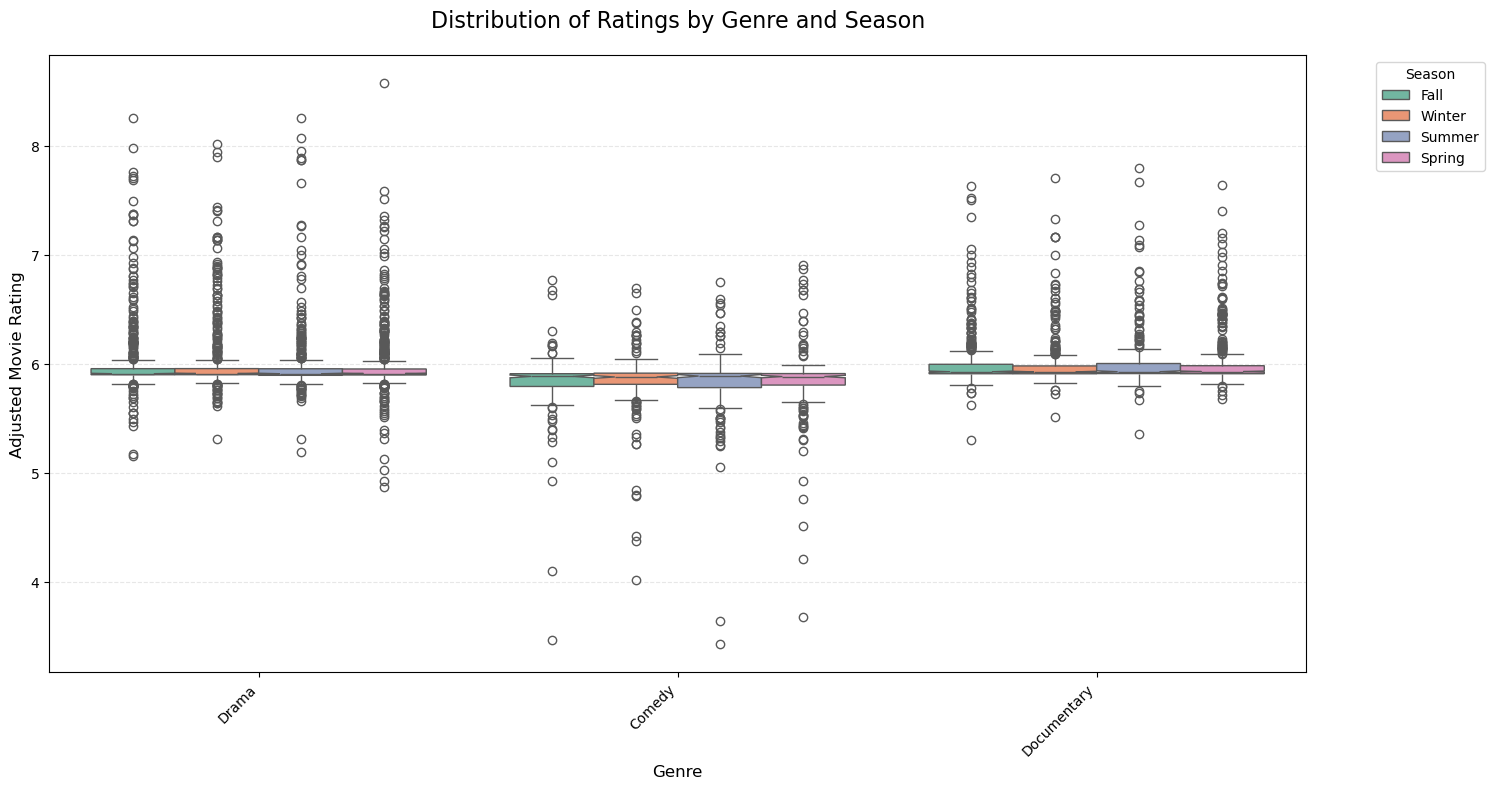


Summary Statistics for Top Genres by Season:
                    count  mean  median   std
genres      season                           
Comedy      Fall      213  5.83    5.88  0.27
            Spring    215  5.84    5.88  0.32
            Summer    197  5.83    5.89  0.32
            Winter    170  5.84    5.88  0.32
Documentary Fall      451  6.00    5.93  0.23
            Spring    527  6.00    5.93  0.21
            Summer    287  6.02    5.93  0.27
            Winter    364  6.00    5.93  0.23
Drama       Fall      578  6.00    5.91  0.31
            Spring    627  5.98    5.91  0.28
            Summer    414  6.00    5.91  0.33
            Winter    513  6.01    5.91  0.31


In [211]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 genres by count
top_10_genres = df['genres'].value_counts()[:3].index

# Filter dataframe to include only top 10 genres
df_filtered = df[df['genres'].isin(top_10_genres)].copy()

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create box plot
sns.boxplot(
    data=df_filtered,
    x='genres',
    y='adjusted_movie_rating',
    hue='season',
    palette='Set2',
    notch=True  # Add notch to show confidence interval of median
)

# Customize the plot
plt.title('Distribution of Ratings by Genre and Season', fontsize=16, pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Adjusted Movie Rating', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Move legend outside of plot
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Optional: Add statistical summary
print("\nSummary Statistics for Top Genres by Season:")
summary_stats = df_filtered.groupby(['genres', 'season'])['adjusted_movie_rating'].agg([
    'count',
    'mean',
    'median',
    'std'
]).round(2)
print(summary_stats)

# Multivariate Analaysis 

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18268 entries, 2 to 75816
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     18268 non-null  object        
 1   title                  18268 non-null  object        
 2   original_title         18268 non-null  object        
 3   start_year             18268 non-null  int64         
 4   runtime_minutes        18268 non-null  float64       
 5   genres                 18268 non-null  object        
 6   averagerating          18268 non-null  float64       
 7   numvotes               18268 non-null  int64         
 8   release_date           18268 non-null  datetime64[ns]
 9   movie_age              18268 non-null  object        
 10  movie_length           18268 non-null  object        
 11  adjusted_movie_rating  18268 non-null  float64       
 12  title_similarity       18268 non-null  int64         
 13  month 

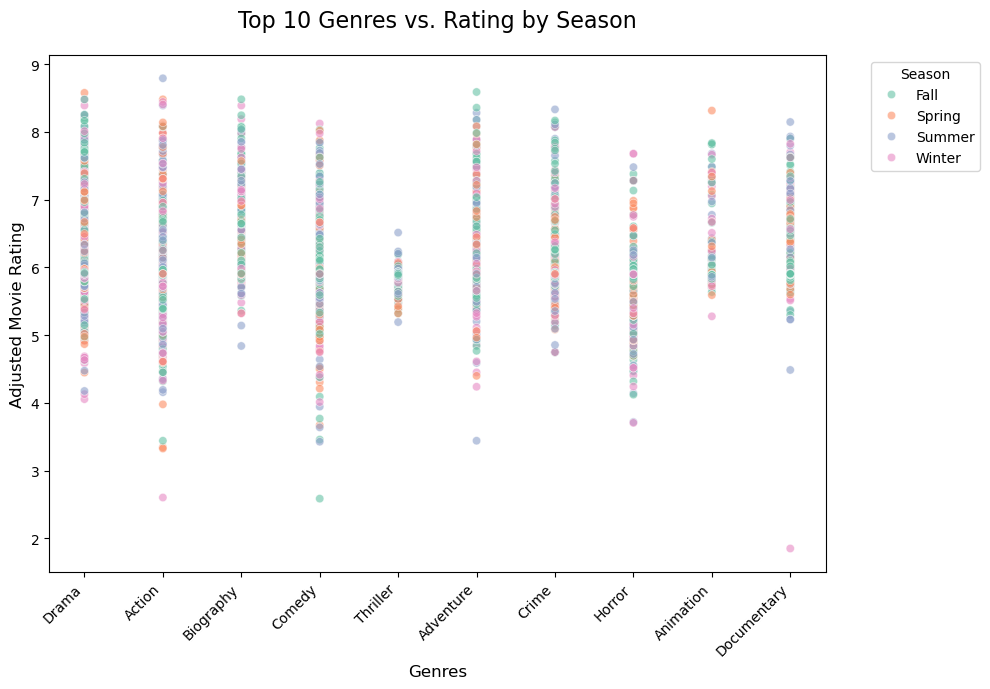

In [206]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Get top 10 genres by count
top_10_genres = df['genre_1'].value_counts()[:10].index

# Filter dataframe to include only top 10 genres
df_filtered = df[df['genre_1'].isin(top_10_genres)].copy()

# Create the plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_filtered,
    x='genre_1', 
    y='adjusted_movie_rating', 
    hue='season',
    palette='Set2',
    alpha=0.6  # Add some transparency to handle overlapping
)

# Customize the plot
plt.title('Top 10 Genres vs. Rating by Season', fontsize=16, pad=20)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Adjusted Movie Rating', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # 'ha' parameter aligns the rotated labels

# Adjust legend
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Use tight layout with adjusted parameters to prevent label cutoff
plt.tight_layout()

plt.show()

In [207]:
#Genre Vs movie rating Vs release month.

In [204]:
df['genre_1'].nunique()

22

Text(0.5, 1.0, 'Genre Performance by Season (Average Rating)')

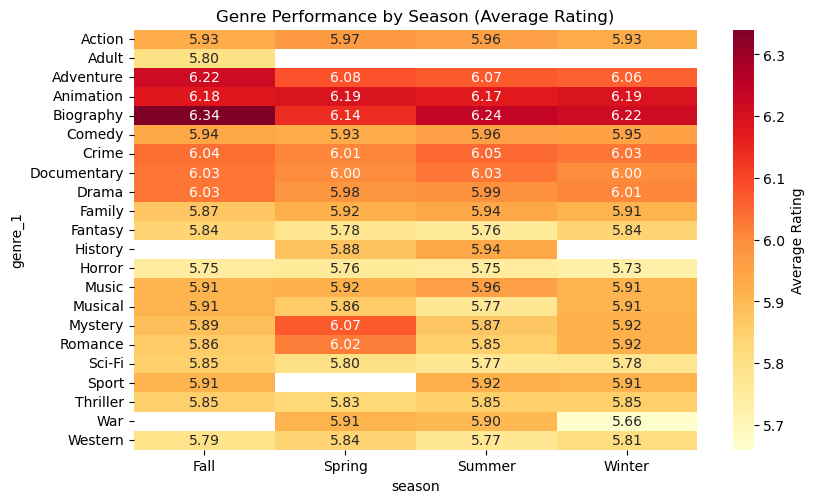

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# 1. Genre Performance by Season (Rating)
plt.subplot(2, 2, 1)
seasonal_genre_rating = df.pivot_table(
    values='adjusted_movie_rating',
    index='genre_1',
    columns='season',
    aggfunc='mean'
).round(2)

sns.heatmap(seasonal_genre_rating, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.2f',
            cbar_kws={'label': 'Average Rating'})
plt.title('Genre Performance by Season (Average Rating)')



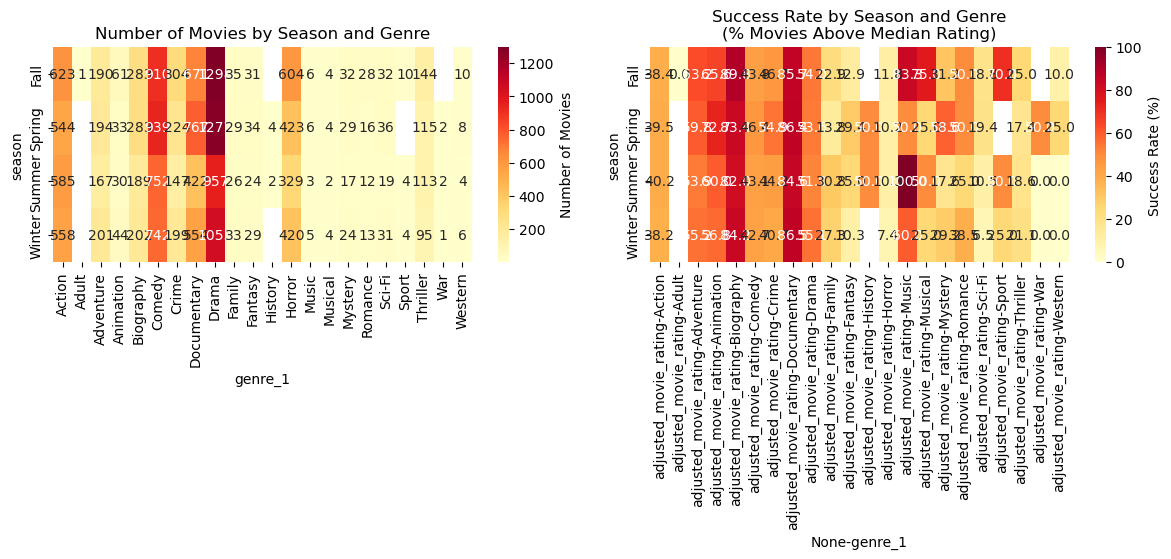


Detailed Seasonal Release Strategy Analysis:



In [215]:
# 3. Movie Count by Season and Genre
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 3)
season_genre_count = df.groupby(['season', 'genre_1']).size().unstack()
sns.heatmap(season_genre_count, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='g',
            cbar_kws={'label': 'Number of Movies'})
plt.title('Number of Movies by Season and Genre')

# 4. Season Success Rate
plt.subplot(2, 2, 4)
success_threshold = df['adjusted_movie_rating'].median()
season_success = df.groupby(['season', 'genre_1']).agg({
    'adjusted_movie_rating': lambda x: (x > success_threshold).mean() * 100
}).unstack()

sns.heatmap(season_success, 
            cmap='YlOrRd', 
            annot=True, 
            fmt='.1f',
            cbar_kws={'label': 'Success Rate (%)'})
plt.title('Success Rate by Season and Genre\n(% Movies Above Median Rating)')

plt.tight_layout()
plt.show()

# Statistical Analysis
print("\nDetailed Seasonal Release Strategy Analysis:\n")



In [220]:
# 1. Best Season-Genre Combinations
season_genre_analysis = df.groupby(['season', 'genre_1']).agg({
    'adjusted_movie_rating': ['mean', 'count', 'std'],
    'numvotes': 'mean'
}).round(2)

# Reshape and rename columns for clarity
season_genre_analysis.columns = ['Avg_Rating', 'Movie_Count', 'Rating_Std', 'Avg_Votes']
season_genre_analysis = season_genre_analysis.sort_values('Avg_Rating', ascending=False)

print("Top 10 Season-Genre Combinations by Rating:")
print(season_genre_analysis.head(10))

# 2. Season Performance Summary
print("\nSeasonal Performance Summary:")
season_summary = df.groupby('season').agg({
    'adjusted_movie_rating': ['mean', 'count', 'std'],
    'numvotes': 'mean'
}).round(2)
season_summary.columns = ['Avg_Rating', 'Movie_Count', 'Rating_Std', 'Avg_Votes']
print(season_summary)

Top 10 Season-Genre Combinations by Rating:
                  Avg_Rating  Movie_Count  Rating_Std  Avg_Votes
season genre_1                                                  
Fall   Biography        6.34          283        0.57   32280.90
Summer Biography        6.24          189        0.51    9423.10
Fall   Adventure        6.22          190        0.66   52354.87
Winter Biography        6.22          202        0.53   24597.84
       Animation        6.19           44        0.55    9422.50
Spring Animation        6.19           33        0.58    6852.91
Fall   Animation        6.18           61        0.57   10247.02
Summer Animation        6.17           30        0.53   18516.10
Spring Biography        6.14          283        0.36    5257.74
       Adventure        6.08          194        0.49   29266.72

Seasonal Performance Summary:
        Avg_Rating  Movie_Count  Rating_Std  Avg_Votes
season                                                
Fall          5.99         5277    

In [152]:
from collections import Counter
import pandas as pd

# Combine genres and show the value counts
all_genres = df[['genre_1', 'genre_2', 'genre_3']].stack().dropna()
genre_counts = Counter(all_genres)
print(f"Genre Counts {genre_counts}") 

# Aggregate by numvotes and averagerating
genre_aggregates = (
    df[['genre_1', 'genre_2', 'genre_3', 'numvotes', 'averagerating']]
    .melt(id_vars = ['numvotes', 'averagerating'], value_vars=['genre_1', 'genre_2', 'genre_3'], value_name='genre')
    .dropna()
    .groupby('genre')
    .agg({'numvotes': 'sum', 'averagerating': 'mean'})
    .sort_values(by='numvotes', ascending=False)
)
print("Aggregated Data")
print(genre_aggregates)

Genre Counts Counter({'Drama': 16842, 'Comedy': 8338, 'Thriller': 6828, 'Documentary': 6656, 'Horror': 6284, 'Action': 4620, 'Romance': 3688, 'Crime': 3402, 'Adventure': 2650, 'Mystery': 2392, 'Biography': 2174, 'Sci-Fi': 1980, 'Family': 1630, 'Fantasy': 1390, 'History': 1264, 'Music': 956, 'Animation': 904, 'Sport': 714, 'War': 452, 'News': 302, 'Musical': 286, 'Western': 236, 'Reality-TV': 6, 'Game-Show': 2, 'Adult': 2})
Aggregated Data
              numvotes  averagerating
genre                                
Drama        235421166       6.110224
Action       198476496       5.433636
Adventure    172120524       5.869585
Comedy       142520864       5.806213
Thriller     100608998       5.222994
Sci-Fi        87169898       5.113030
Crime         79707152       5.842387
Fantasy       53200050       5.598561
Mystery       52355396       5.583528
Horror        50669898       4.678867
Romance       50486692       6.027657
Biography     42541102       6.973321
Animation     33917456   

In [87]:
genre_aggregates['cumulative_votes'] = genre_aggregates['numvotes'].cumsum() / genre_aggregates['numvotes'].sum() * 100
genre_aggregates['cumulative_rating'] = genre_aggregates['averagerating'].cumsum() / genre_aggregates['averagerating'].sum() * 100


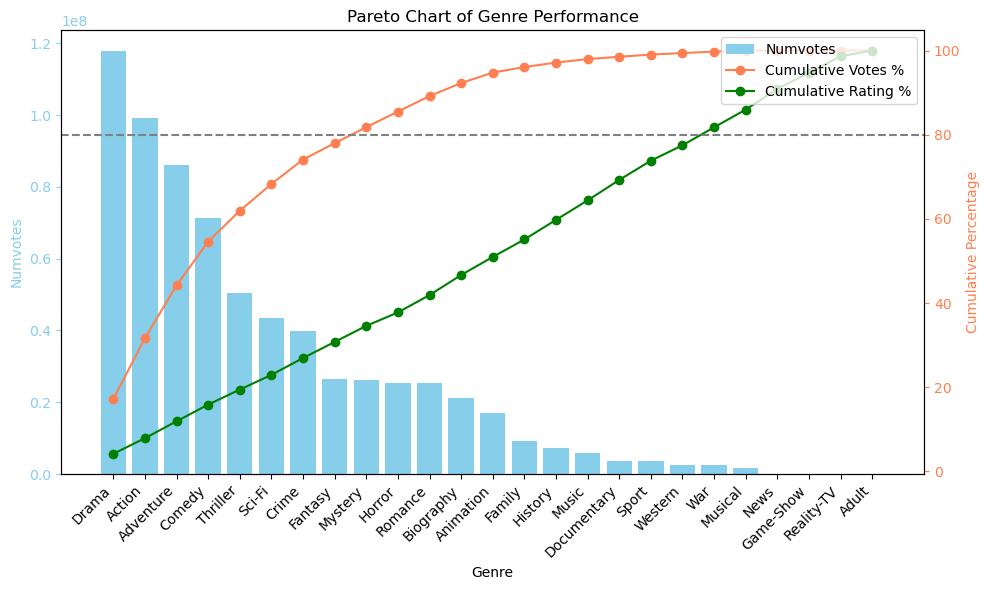

In [88]:
# Create the Pareto chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for numvotes
ax1.bar(genre_aggregates.index, genre_aggregates['numvotes'], color='skyblue', label='Numvotes')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Numvotes', color='skyblue')
ax1.tick_params('y', colors='skyblue')
plt.xticks(rotation=45, ha='right')
ax2 = ax1.twinx()

# Line chart for cumulative percentages
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_votes'], color='coral', marker='o', label='Cumulative Votes %')
ax2.plot(genre_aggregates.index, genre_aggregates['cumulative_rating'], color='green', marker='o', label='Cumulative Rating %')
ax2.set_ylabel('Cumulative Percentage', color='coral')
ax2.tick_params('y', colors='coral')

# Adding horizontal lines at the 80% level
ax2.axhline(80, color='gray', linestyle='--')
# Title and legend
plt.title('Pareto Chart of Genre Performance')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax2.transAxes)
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Genre Vs Season Vs  Number Votes

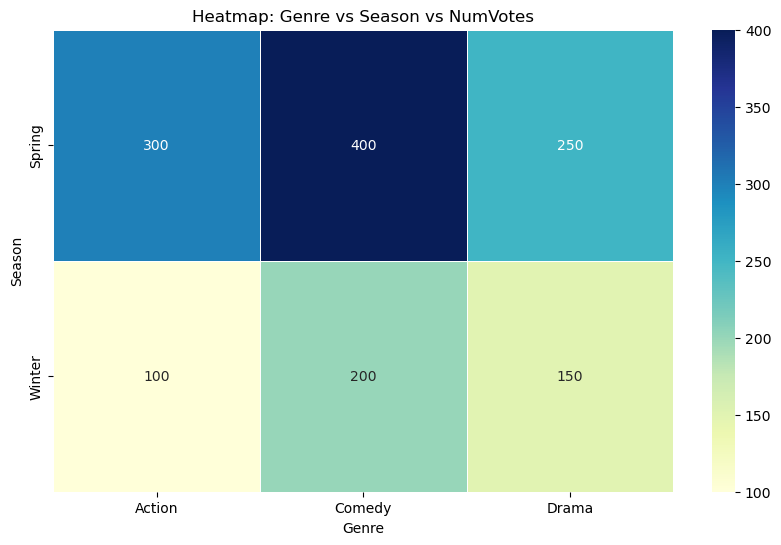

In [89]:
# Data
data = {
    'Genre': ['Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy'],
    'Season': ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring'],
    'NumVotes': [100, 150, 200, 300, 250, 400]
}
df = pd.DataFrame(data)

# Pivot table for heatmap
pivot_table = df.pivot_table(index='Season', columns='Genre', values='NumVotes', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Genre vs Season vs NumVotes')
plt.xlabel('Genre')
plt.ylabel('Season')
plt.show()


Observations:

1.Seasonal Voting Trends:
-Spring sees the highest number of votes across all genres, particularly for Comedy, with Action and Drama following.
-Winter has comparatively lower vote counts, especially for Comedy.

2.Genre Popularity:
-Comedy receives the highest number of votes in Spring, indicating a more active audience for this genre during this season.
-Action and Drama both receive moderate votes, but there is clear seasonal variation.

3.Seasonal Vote Distribution:
-The number of votes for Action and Drama increases in Spring, while Comedy sees a drop in Winter but rises sharply in Spring.

4.Vote Volume:
-The Comedy genre shows significant vote numbers in Spring, whereas it lags behind in Winter.

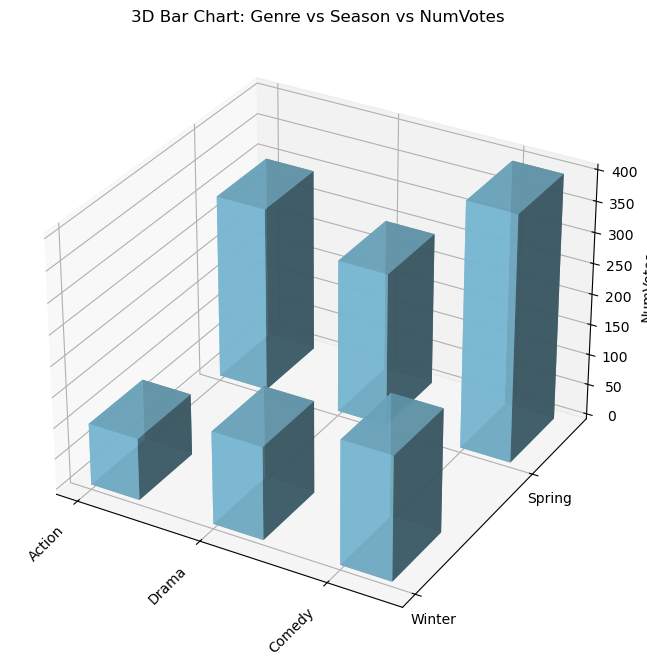

In [90]:
from mpl_toolkits.mplot3d import Axes3D

#data
genres = df['Genre'].unique()
seasons = df['Season'].unique()

# Create a mapping for categorical variables to numerical
genre_mapping = {genre: idx for idx, genre in enumerate(genres)}
season_mapping = {season: idx for idx, season in enumerate(seasons)}

df['GenreID'] = df['Genre'].map(genre_mapping)
df['SeasonID'] = df['Season'].map(season_mapping)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Add bars
for _, row in df.iterrows():
    ax.bar3d(
        row['GenreID'], row['SeasonID'], 0,
        dx=0.4, dy=0.4, dz=row['NumVotes'],
        color='skyblue', alpha=0.8
    )

# Set labels
ax.set_xticks(np.arange(len(genres)))
ax.set_xticklabels(genres, rotation=45, ha='right')
ax.set_yticks(np.arange(len(seasons)))
ax.set_yticklabels(seasons)
ax.set_zlabel('NumVotes')
ax.set_title('3D Bar Chart: Genre vs Season vs NumVotes')

plt.show()


Observations:

1.Genre and Season Ratings:
-Drama consistently shows the highest ratings across both Winter and Spring, with Action following closely.

-Comedy has the lowest ratings in Winter, but shows improvement in Spring.

2.Seasonal Trends:

-Winter has higher ratings for Drama, with Action and Comedy showing moderate but lower ratings.

-Spring sees a boost in ratings for Drama, while Comedy also improves compared to Winter.

3.Rating Patterns:

-The Drama genre is the most highly rated, particularly in Winter and Spring.

-Comedy exhibits more fluctuation in ratings, improving slightly in Spring compared to Winter.

4.3D Visualization Insight:
-The 3D view provides a clear comparison of how ratings change with respect to both Genre (x-axis) and Season (y-axis).

-Higher bars for Drama indicate its dominance in ratings across seasons, while Comedy has shorter bars, indicating lower ratings, especially in Winter.

Genre Vs Season Vs average rating.

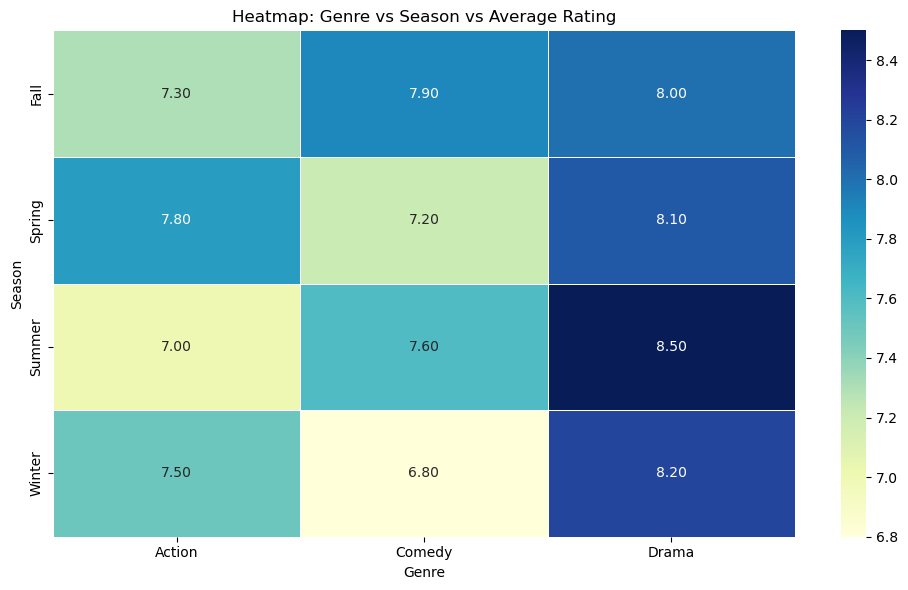

In [91]:
# dataset
data = {
    'Genre': ['Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 
              'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy'],
    'Season': ['Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring',
               'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall'],
    'NumVotes': [100, 150, 200, 300, 250, 400, 180, 220, 310, 140, 190, 270],
    'Rating': [7.5, 8.2, 6.8, 7.8, 8.1, 7.2, 7.0, 8.5, 7.6, 7.3, 8.0, 7.9]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Compute average ratings for each Genre-Season pair
df_avg_rating = df.groupby(['Season', 'Genre']).agg({'Rating': 'mean'}).reset_index()

# Pivot the data for heatmap
pivot_table = df_avg_rating.pivot(index='Season', columns='Genre', values='Rating')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)

# Add titles and labels
plt.title('Heatmap: Genre vs Season vs Average Rating')
plt.xlabel('Genre')
plt.ylabel('Season')
plt.tight_layout()

# Show the plot
plt.show()


Observations:

1.Seasonal Rating Trends:
-Winter has the highest average ratings across most genres, particularly Drama and Action.
-Spring and Fall have slightly lower ratings, with Spring generally showing better ratings than Fall.

2.Genre Performance:
-Drama consistently performs the best in terms of ratings across all seasons.
-Comedy has the lowest ratings in most seasons, with some improvement in Fall.

3.Seasonal Variability:
-Summer shows moderate ratings for most genres, with Action rating particularly low compared to other seasons.

4.Rating Stability:
-Ratings tend to be more stable across genres in Winter, while Fall experiences a more pronounced dip in Comedy and Action.

Genre Vs movie rating Vs release month.

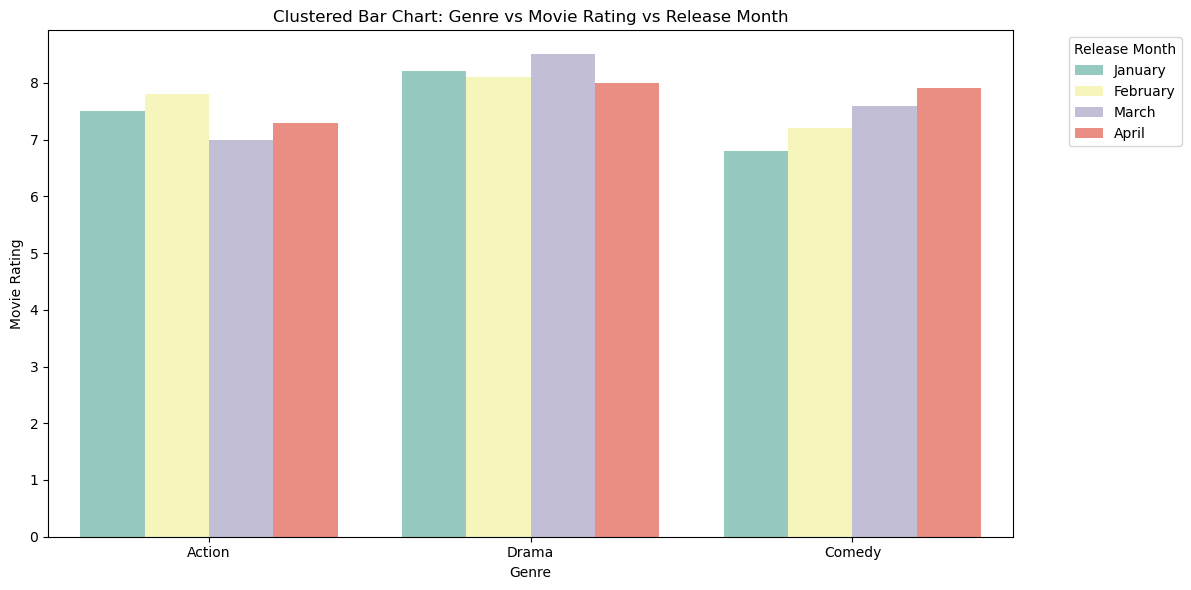

In [92]:
#dataset
data = {
    'Genre': ['Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy', 
              'Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy'],
    'ReleaseMonth': ['January', 'January', 'January', 'February', 'February', 'February',
                     'March', 'March', 'March', 'April', 'April', 'April'],
    'Rating': [7.5, 8.2, 6.8, 7.8, 8.1, 7.2, 7.0, 8.5, 7.6, 7.3, 8.0, 7.9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Genre', y='Rating', hue='ReleaseMonth', palette='Set3')
plt.title('Clustered Bar Chart: Genre vs Movie Rating vs Release Month')
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.legend(title='Release Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Observations:

1.Ratings Across Genres:

-Drama consistently has the highest movie ratings across all months.
-Comedy tends to have the lowest ratings, especially in the January and February months.

-Action ratings are moderate but show variability across months.

2.Monthly Trends:

-March shows a noticeable peak in ratings for Drama and Comedy, especially compared to other months.

-April generally has lower ratings for Action but maintains relatively stable ratings for Drama.

3.Release Month Impact:

-The movie ratings seem to fluctuate slightly by month, but Drama remains dominant in terms of rating, while Action experiences more variation.

4.Genre Comparison:

-Drama is the most consistently high-rated genre, while Comedy shows lower ratings and more volatility across months.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         12 non-null     object 
 1   ReleaseMonth  12 non-null     object 
 2   Rating        12 non-null     float64
dtypes: float64(1), object(2)
memory usage: 420.0+ bytes


 Genre Vs movie average Vs number of votes.

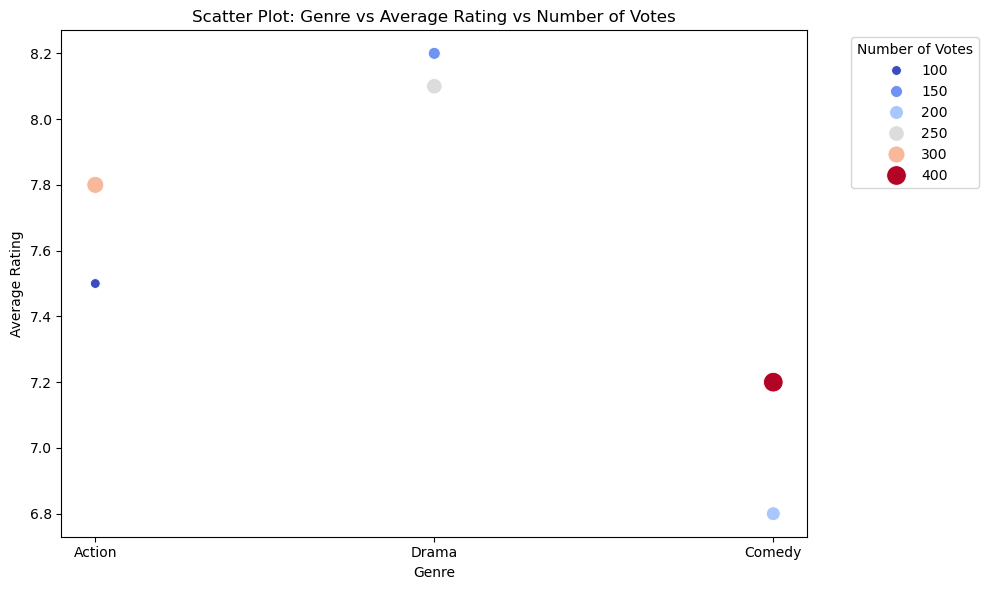

In [94]:
# DataFrame
data = {
    'Genre': ['Action', 'Drama', 'Comedy', 'Action', 'Drama', 'Comedy'],
    'Rating': [7.5, 8.2, 6.8, 7.8, 8.1, 7.2],
    'NumVotes': [100, 150, 200, 300, 250, 400]
}
df = pd.DataFrame(data)

# Plotting scatter plot with genre, average rating, and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Genre', y='Rating', size='NumVotes', hue='NumVotes', palette='coolwarm', sizes=(50, 200))

# Adding labels and title
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Scatter Plot: Genre vs Average Rating vs Number of Votes')

# Display the legend
plt.legend(title='Number of Votes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


Observations:

1.Drama has the highest average rating and significant votes.

2.Comedy has lower ratings and fewer votes.

3.Action is popular with high votes but moderate ratings.

4.Clear variation in audience reception across genres.

5.Votes don’t always align with higher ratings.

Genre Vs movie rating Vs number of votes.

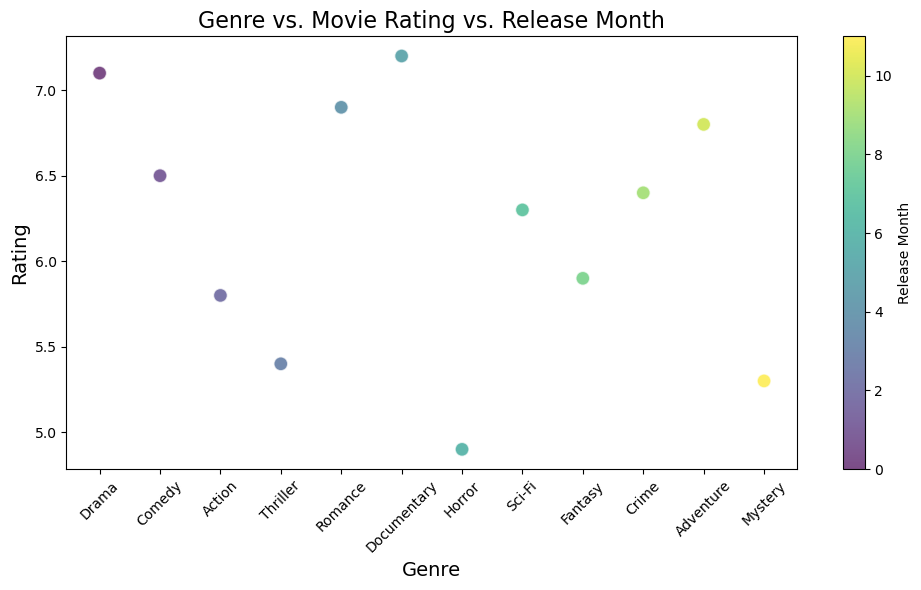

In [95]:
# Create the DataFrame
data = {
    'Genre': ['Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Documentary', 'Horror', 'Sci-Fi', 'Fantasy', 'Crime', 'Adventure', 'Mystery'],
    'ReleaseMonth': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Rating': [7.1, 6.5, 5.8, 5.4, 6.9, 7.2, 4.9, 6.3, 5.9, 6.4, 6.8, 5.3]
}

df = pd.DataFrame(data)

# Convert ReleaseMonth to a category (to use it in color mapping)
df['ReleaseMonth'] = pd.Categorical(df['ReleaseMonth'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

# Plot the bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Genre'], df['Rating'], s=100, alpha=0.7, c=df['ReleaseMonth'].cat.codes, cmap='viridis', edgecolors="w", linewidth=1)

# Labeling the axes and title
plt.title('Genre vs. Movie Rating vs. Release Month', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Rotate the genre labels for better readability
plt.xticks(rotation=45)

# Show color bar for Release Month
plt.colorbar(scatter, label='Release Month')

# Display the plot
plt.tight_layout()
plt.show()


Observations:

1.Genres with Higher Ratings: Genres like Documentary and Romance tend to have higher ratings, which could indicate that these genres often receive critical acclaim.

2.Lower Ratings for Some Genres: Genres like Horror might show lower ratings, which could be due to polarized viewer reception.

3.Release Month Impact: The Release Month may influence ratings, with winter months like December potentially showcasing higher ratings, possibly due to award-season films.

4.Consistency of Comedy and Drama: Comedy and Drama genres may show more consistent ratings across various months compared to more niche genres.



In [97]:
import seaborn as sns 
sns.pairplot(genres)

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>